### **Expt No: 1**   
##**DESCRIPTIVE ANALYSIS**

### **AIM:** <br>
To study and perform descriptive analysis the dataset using Python packages. <br>
<br>

### **SOURCE CODE:** <br>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('titanic.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_corr = data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr.drop(df_corr.iloc[1::2].index, inplace=True)
df_corr_nd = df_corr.drop(df_corr[df_corr['Correlation Coefficient'] == 1.0].index)

In [ ]:
corr = df_corr_nd['Correlation Coefficient'] > 0.1
df_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
8,Pclass,Fare,0.549500
10,Parch,SibSp,0.414838
12,Age,Pclass,0.369226
14,Pclass,Survived,0.338481
16,Age,SibSp,0.308247
18,Survived,Fare,0.257307
20,Parch,Fare,0.216225
22,Parch,Age,0.189119
24,Fare,SibSp,0.159651


In [ ]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df_one = pd.get_dummies(data["Sex"])
df_two = pd.concat((df_one, data), axis=1)
data = df_two.drop(["Sex"], axis=1)

In [ ]:
data

,female,male,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,1,0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,0,1,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
887,1,0,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
888,1,0,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S
889,0,1,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C


In [ ]:
data = data.drop(["male"], axis=1)

In [ ]:
data = data.rename(columns={"female": "Sex"})

## Data Visualization

In [ ]:
import seaborn as sns

In [ ]:
data

,Sex,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,0,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
887,1,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
888,1,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S
889,0,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C


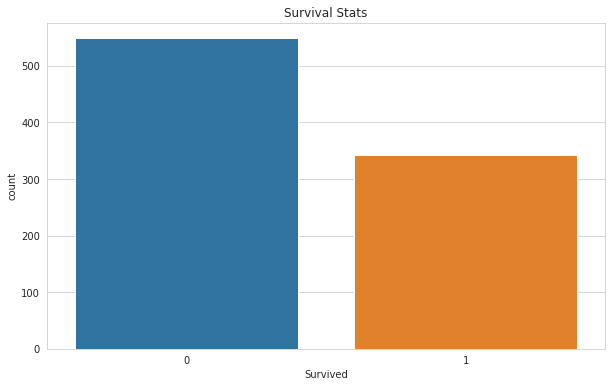

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = data)
plt.title('Survival Stats')
plt.show()

Text(0.5, 1.0, 'Male/Female survivors')

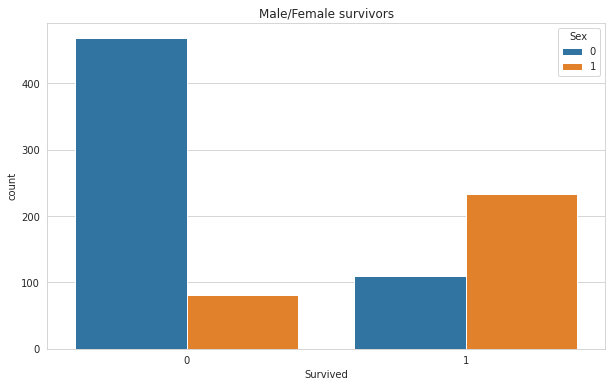

In [ ]:
# To check if there is dependance of Sex/Gender on the people who survived
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = data)
plt.title("Male/Female survivors")
# Conclusion: more than twice the number of men died in the disaster as compared to women

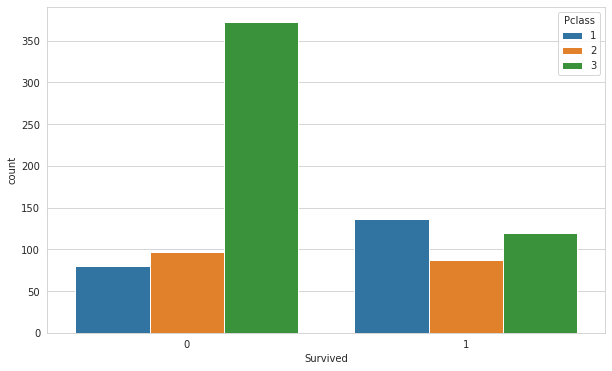

In [ ]:
# To check how it look's when we divide survival of passengers by Ticket class
plt.figure(figsize = (10,6))
sns.countplot(x = "Survived", data = data, hue = "Pclass")
plt.show()
# Conclusion: No. of non-survivors belong to Class 3 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


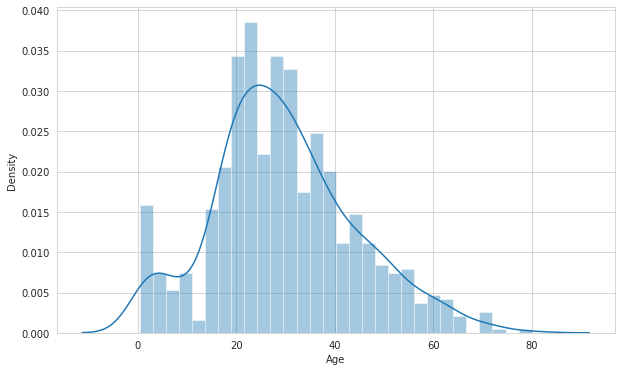

In [ ]:
# To check the distribution of passengers age
plt.figure(figsize = (10,6))
sns.distplot(data['Age'].dropna(), bins = 30)

(array([496., 191.,  45.,  45.,  48.,  13.,  11.,  11.,   9.,   2.,   0.,
          0.,   5.,   4.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <a list of 30 Patch objects>)

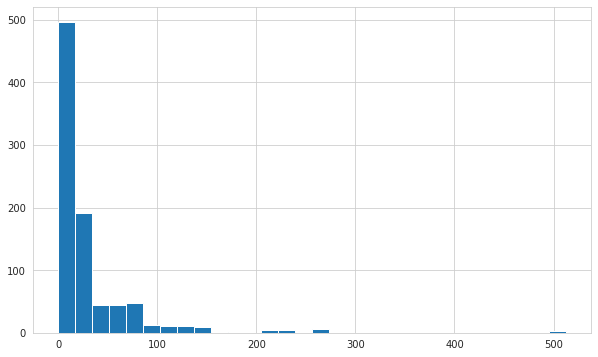

In [ ]:
# To check the distribution of passengers fare
plt.figure(figsize = (10,6))
plt.hist(data['Fare'],bins = 30)

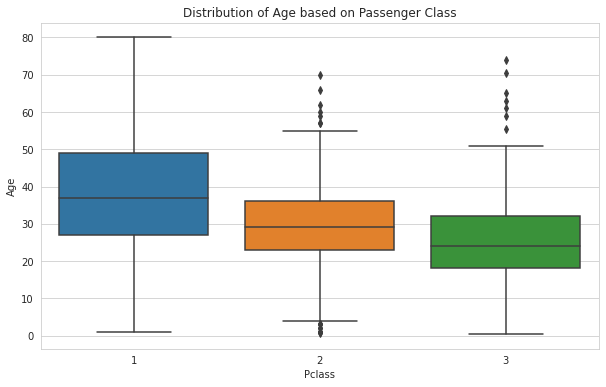

In [ ]:
# Creating a BoxPlot to check if Age can depend on the Passengers Class
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Pclass', y = 'Age', data = data)
plt.title("Distribution of Age based on Passenger Class")
plt.show()
# Conclusion: Passengers who bought tickets in first class are older than passengers in other classes

### **RESULT:** <br>
Thus, descriptive analysis was performed on the choosen dataset and was noted.

### **Expt No: 2**                           
## **CLASSIFIERS**

### **AIM:** <br>
To analyze and deploy various classification algorithms using Python packages on the choosen dataset.
<br>
<br>
### **SOURCE CODE:** <br>

## Splitting train & test datasets

In [ ]:
data.interpolate(method ='linear', limit_direction ='backward', inplace=True)

In [ ]:
X = data.drop('Survived', axis = 1)
X = X.drop('Name', axis = 1)
X = X.drop('Ticket', axis = 1)
X = X.drop('Cabin', axis = 1)
X = X.drop('Embarked', axis = 1)
y = data['Survived']

In [ ]:
X

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,1,3,22.0,1,0,7.2500
1,1,2,1,38.0,1,0,71.2833
2,1,3,3,26.0,0,0,7.9250
3,1,4,1,35.0,1,0,53.1000
4,0,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,887,2,27.0,0,0,13.0000
887,1,888,1,19.0,0,0,30.0000
888,1,889,3,22.5,1,2,23.4500
889,0,890,1,26.0,0,0,30.0000


## Model Selection

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 1)

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import decomposition
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (668, 7)
y_train shape: (668,)
X_test shape: (223, 7)


### 1. Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

79.82

### 2. Logistic Regression

In [ ]:
l_model = LogisticRegression()
l_model.fit(X_train,y_train)
y_pred = l_model.predict(X_test)
l_model.score(X_test, y_test)
acc_log_reg =  round(l_model.score(X_test, y_test) * 100, 2)
acc_log_reg

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


78.48

### 3. K-Nearest Neighbours

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_test, y_test)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

78.48

### 4. Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_test, y_test)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

100.0

### 5. Support Vector Machines

In [ ]:
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
svm_model.score(X_test, y_test)
acc_svm =  round(svm_model.score(X_test, y_test) * 100, 2)
acc_svm

60.99

### 6. Naive Bayes Classifier

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)
nb_model.score(X_test, y_test)
acc_nb =  round(nb_model.score(X_test, y_test) * 100, 2)
acc_nb

76.23

### 7. Backpropagation Neural Networks

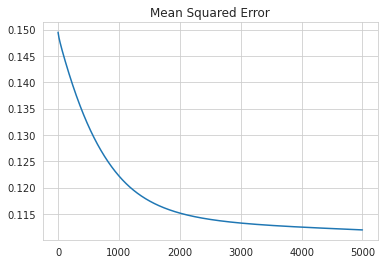

In [ ]:
y=pd.get_dummies(data['Survived']).values
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=27)
def sigmoid(x):
	return 1 / (1 + np.exp(-x))
def mean_squared_error(y_pred, y_true):    
	return ((y_pred - y_true)**2).sum() / (2*y_pred.size)    
def accuracy(y_pred, y_true):
	acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
	return acc.mean()

learning_rate = 0.01
iterations = 5000
N = y_train.size
input_size = 7
hidden_size = 5
output_size = 2  
results = pd.DataFrame(columns=["mse", "accuracy"])
np.random.seed(10)
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))
for itr in range(iterations):    
	# feedforward propagation
	# on hidden layer
	Z1 = np.dot(X_train, W1)
	A1 = sigmoid(Z1)
	# on output layer
	Z2 = np.dot(A1, W2)
	A2 = sigmoid(Z2)
	# Calculating error
	mse = mean_squared_error(A2, y_train)
	acc = accuracy(A2, y_train)
	results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
	# backpropagation
	E1 = A2 - y_train
	dW1 = E1 * A2 * (1 - A2)
	E2 = np.dot(dW1, W2.T)
	dW2 = E2 * A1 * (1 - A1)    
	# weight updates
	W2_update = np.dot(A1.T, dW1) / N
	W1_update = np.dot(X_train.T, dW2) / N
	W2 = W2 - learning_rate * W2_update
	W1 = W1 - learning_rate * W1_update
#Results
results.mse.plot(title="Mean Squared Error")


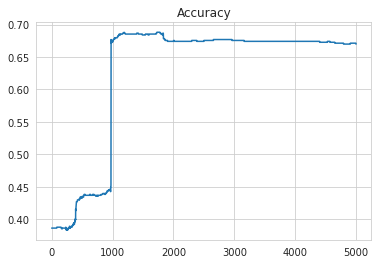

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
acc_bp = accuracy(A2, y_test)
print("Accuracy: {}".format(acc_bp))

Accuracy: 0.6703910614525139


## Models Comparison

In [ ]:
models = pd.DataFrame({
    'Model': ['Random Forest',
             'Logistic Regression',
             'KNN',
             'Decision Tree',
             'Support Vector Machines',
             'Naive Bayes Classifier'],
    'Score': [acc_random_forest, 
              acc_log_reg, 
              acc_knn, 
              acc_decision_tree,
              acc_svm,
              acc_nb,]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,100.00
0,Random Forest,79.82
1,Logistic Regression,78.48
2,KNN,78.48
5,Naive Bayes Classifier,76.23
4,Support Vector Machines,60.99


### **RESULT:** <br>
Thus, different clasifiers were tried out on the choosen dataset and was noted.

### **Expt No: 3**                           
## **BIVARIATE ANALYSIS**

### **AIM:** <br>
To perform bivariate analysis on the given dataset to predict if the person has survived or not.
<br>
<br>
### **SOURCE CODE:** <br>

**Chi-squared test**

In [ ]:
from scipy.stats import chi2_contingency  
contingency= pd.crosstab(data['Sex'], data['Survived'])
print(contingency)

Survived    0    1
Sex               
0         468  109
1          81  233


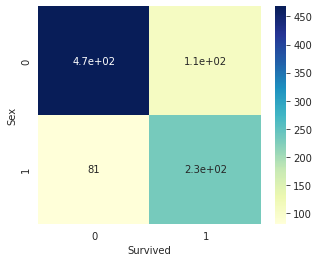

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [ ]:
c, p, dof, expected = chi2_contingency(contingency)
alpha=0.05
print("p value is :"+str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is :1.1973570627755645e-58
Dependent (reject H0)


### Linear Regression

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
lin_model.score(X_test, y_test)
acc_lin_reg =  round(lin_model.score(X_test, y_test) * 100, 2)
acc_lin_reg

39.05

### **RESULT:** <br>
Bivariate analysis has been performed successfully.

### **Expt No: 4**                           
## **MULTIVARIATE REGRESSION**

### **AIM:** <br>
To perform multivariate regression to predict if person has survived or not.
<br>
<br>
### **SOURCE CODE:** <br>

**Multivariate Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=data['Fare'].values.reshape(-1,1)
Y=data['Age'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=27)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

-0.008347512050692174

### **RESULT:** <br>
Multivariate regression has been performed successfully.